# Donor Choose

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

donor = pd.read_csv('donortrain.csv')

In [3]:
donor.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [4]:
donor.columns 

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

In [5]:
donor.shape

(109248, 17)

In [6]:
# To ignore Warnings
#import warnings
#warnings.filterwarnings('ignore')

In [7]:
donor['teacher_id'].count()

109248

In [8]:
donor['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

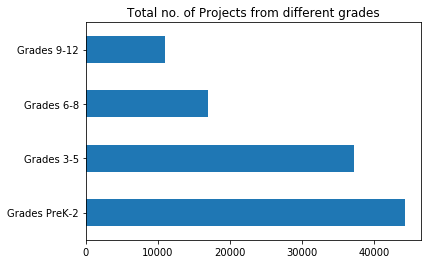

In [9]:
import matplotlib.pyplot as plt

donor[ 'project_grade_category' ].value_counts().plot(kind='barh') 
plt.title( 'Total no. of Projects from different grades' )
plt.show()

Highest number of Projects that need approval are from Pre KG to 2nd Grade

While the lowest number of projects are from 9th grade to 12th grade acroos all Schools <br><br>

In [10]:
donor['project_subject_categories'].value_counts()[:10]

Literacy & Language                      23655
Math & Science                           17072
Literacy & Language, Math & Science      14636
Health & Sports                          10177
Music & The Arts                          5180
Special Needs                             4226
Literacy & Language, Special Needs        3961
Applied Learning                          3771
Math & Science, Literacy & Language       2289
Applied Learning, Literacy & Language     2191
Name: project_subject_categories, dtype: int64

In [11]:
# Counting the Frequency of different states participating

count = donor['school_state'].value_counts()
len(count)

51

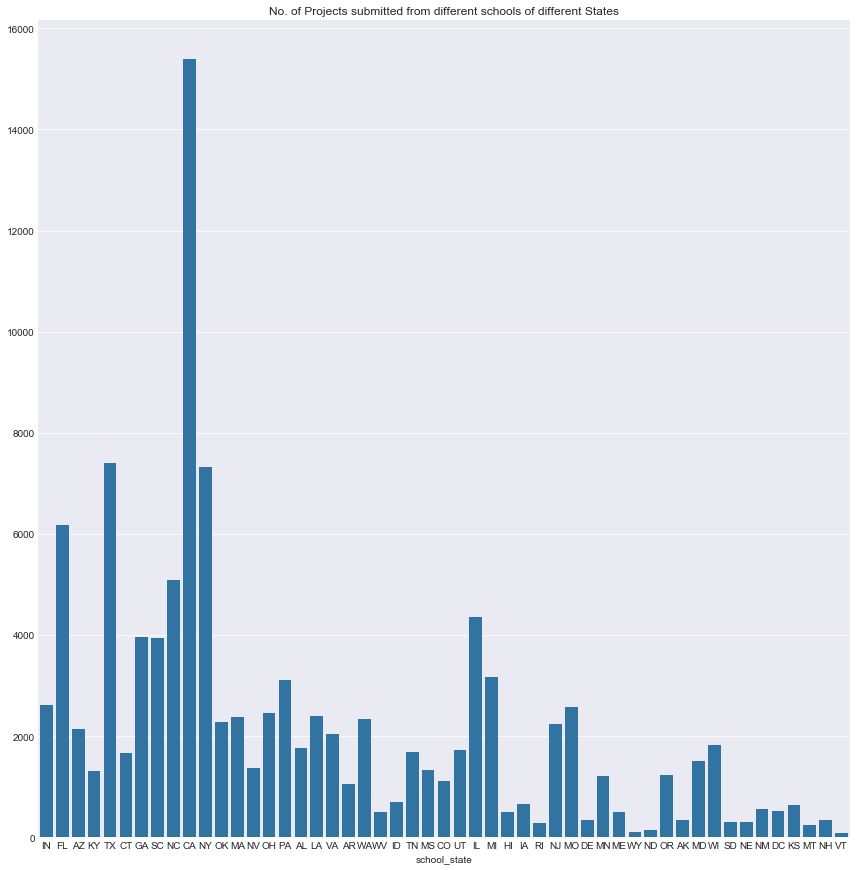

In [12]:
import seaborn as sns

plt.close()
sns.set_style("darkgrid")
sns.FacetGrid(donor, size=12).map(sns.countplot, "school_state")  # countplot : histogram around a category
plt.title( 'No. of Projects submitted from different schools of different States' )
plt.show()

School's from 51 different state apply for funding of their project

The above graph shows the distribution of states and number projects submitted by their respective schools 

North Calorina has the highest number of submission, while Texas has the second highest

Meanwhile Wyoming and Vermont have lowest submission <br><br>

In [13]:
approval = donor[ 'project_is_approved' ].value_counts()

approval

1    92706
0    16542
Name: project_is_approved, dtype: int64

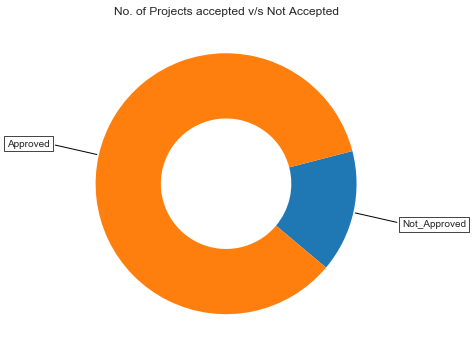

In [14]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(aspect="equal"))  # change here on figsize

recipe = ["Not_Approved", "Approved"]     # change here 

data = [approval[0], approval[1]]         # change here

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("No. of Projects accepted v/s Not Accepted")

plt.show()

# Ref : https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


Number of projects accepted for Funding is 92706

Number of projects rejected for Funding is 16542

In [15]:
resource = pd.read_csv('resources.csv')

resource.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [16]:
resource.shape

(1541272, 4)

In [17]:
resource['quantity'].value_counts()

1      1029474
2       186587
3        76127
4        60498
5        52793
6        33355
10       21190
8        11404
30        8197
20        7190
7         7159
25        6446
15        5633
12        5452
9         3971
24        2258
35        1687
40        1538
11        1300
22        1254
16        1242
50        1237
18        1188
13        1167
28        1022
14         997
26         965
60         771
32         761
27         730
        ...   
720          1
290          1
173          1
287          1
206          1
139          1
168          1
165          1
163          1
161          1
158          1
91           1
157          1
195          1
201          1
101          1
207          1
282          1
209          1
750          1
215          1
222          1
228          1
109          1
247          1
153          1
256          1
111          1
172          1
143          1
Name: quantity, Length: 208, dtype: int64

In [18]:
resource['price'].sum()

77501284.38996047

There's a total price of 77,501,284.39 needed for funding for different projects 

Resource table's ID corresponds to Donor's table ID 

## Calculating Total projects, Projects Approved and Avegrage projects per State

In [19]:
# Counting number of 1's in a column and returning the sum of number of 1's 
# This gives total number of approved projects

x = donor['project_is_approved'].agg( lambda x : x.eq(1).sum() )
x
# Aggregate using one or more operations over the specified axis.

# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html

92706

In [20]:
# getting count of Project approved in different schools of different states

x = donor.groupby('school_state')  ['project_is_approved' ].agg( lambda x: x.eq(1).sum() )
x.head()

# .agg() applied on project_is_approved can contain a function too so we used Lambda func 
# we check if value in project_is_approved i.e; x is equal to 1 and if it is we use a .sum() func to add
# Then we group those sum and display it State Wise 
# But there is an index problem
# This is a series not a df cause of the index problem

school_state
AK      290
AL     1506
AR      872
AZ     1800
CA    13205
Name: project_is_approved, dtype: int64

In [21]:
# Resolving the index issue

x = donor.groupby('school_state')  ['project_is_approved' ].agg( lambda x: x.eq(1).sum() ).reset_index()
x.head()

# Reset the index, or a level of it. Reset the index of the DataFrame, and use the default one instead.
# Default index here is provided school_state and project_is_approved that is used in calculation
# This x is a df cause the index issue is resolved

# Ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

,school_state,project_is_approved
0,AK,290
1,AL,1506
2,AR,872
3,AZ,1800
4,CA,13205


In [22]:
# Now adding a column that will contain Total number of projects per state

x['totalpr'] = donor.groupby('school_state')  ['project_is_approved' ].agg( {'totalpr':'count'} ).reset_index()['totalpr']
x.head()

# We can pass a func in agg in the form of function, str, list, dictionary
# We we 1st added a new column totalpr that will hold the total number of projects
# Then we passed a dictionary {'column name':'any function'} in our .agg() which is working on project_is_approved column
# totalpr is the key and the value is a function it can be sum, count, mean, avg etc
# Since we want Total number of projects from Project is approved that contains only 0 and 1 
# we need to count the number of rows so we use count function and not sum
# The we use reset_index() and append ['column name'] to clear the NaN problem

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,school_state,project_is_approved,totalpr
0,AK,290,345
1,AL,1506,1762
2,AR,872,1049
3,AZ,1800,2147
4,CA,13205,15388


In [23]:
# We add a column that contains average number of projects in a State

x['avg'] = donor.groupby('school_state')  ['project_is_approved' ].agg( {'avg':'mean'} ).reset_index()['avg']
x.head()
#import warnings  # To remove the warnings i.e; the red box
#warnings.filterwarnings('ignore')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,school_state,project_is_approved,totalpr,avg
0,AK,290,345,0.840580
1,AL,1506,1762,0.854711
2,AR,872,1049,0.831268
3,AZ,1800,2147,0.838379
4,CA,13205,15388,0.858136


In [24]:
x.sort_values(by=['totalpr'],inplace=True, ascending=False)
x.head()

# We Sort our table with Total projects totalpr as reference 
# inplace = True means don't return a copy change it in place i.e; mem
# ascending = False means show it in descending order

# Ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,school_state,project_is_approved,totalpr,avg
4,CA,13205,15388,0.858136
43,TX,6014,7396,0.813142
34,NY,6291,7318,0.859661
9,FL,5144,6185,0.831690
27,NC,4353,5091,0.855038


<b>Calculation Over <br><br>

In [25]:
x.shape[0]  # Gives number of rows

51

### Functions to  Create a Custom Stack Bar Plot

In [26]:
def stackPlot( data, xtick, col2='project_is_approved', col3='Total'):
    
    ind = np.arange( data.shape[0] )  # Returns an array of numbers from 0 to number to rows in data    
    
    plt.figure( figsize = (20,5) )
    p1 = plt.bar( ind, data[col3].values ) # Plots a horizontal bar for column Total
    p2 = plt.bar( ind, data[col2].values ) # Plots a bar for which we've calculated the Total and Avg by default it's is approved
    
    plt.ylabel( 'Projects' )  
    plt.xticks(ind, list(data[xtick].values))  # converting values of col1 to a list for Mapping label on X-axis
    plt.title( 'Number of Projects approved vs disapproved' )
    plt.legend( ( p1[0], p2[0] ), ( 'Total', 'Accepted' ) )
    plt.show()

# Ref : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

In [27]:
def customBar( col1, col2, top=0 ):   
    
    df = donor.groupby( col1 )  [ col2 ].agg( lambda x: x.eq(1).sum() ).reset_index()
    # df contains col1 and No. of col2 per col1
    
    df['Total'] = donor.groupby( col1 )  [ col2 ].agg( { 'Total' : 'count' } ).reset_index()['Total']
    
    df['Avg'] = donor.groupby( col1 )  [ col2 ].agg( { 'Avg' : 'mean' } ).reset_index()['Avg']
    
    df.sort_values( by='Total', inplace=True, ascending=False )
    
    if top:         # top is set to 0 we we want Top 10 or 20 values we set it a particular val on function call
        df = df[:top]    
        
    stackPlot( df, col1, col2, 'Total')   # Function Call here
    
    print( df.head() )  # For extra Details 
    print( '-'*70 )
    print( df.tail() )

In [28]:
plt.close()

# Univariate Analysis

## School State

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


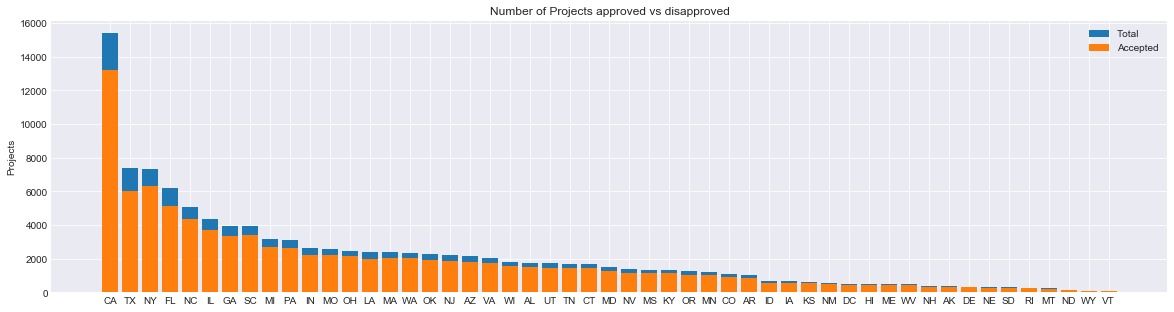

   school_state  project_is_approved  Total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
----------------------------------------------------------------------
   school_state  project_is_approved  Total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [29]:
customBar( 'school_state', 'project_is_approved' )

Above graph shows different School State on X-axis and no. of projects approved and disapproved on Y-axis

Every one of the State has > 80 % successful Approval rate <br><br>


## Teacher Prefix

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


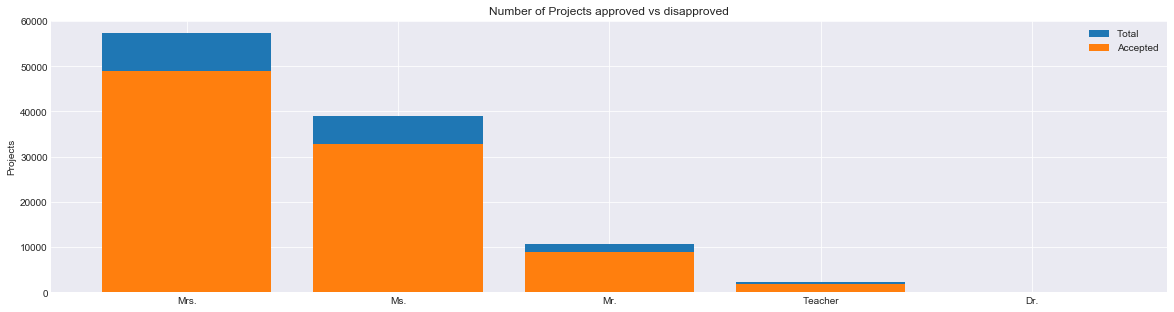

  teacher_prefix  project_is_approved  Total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
----------------------------------------------------------------------
  teacher_prefix  project_is_approved  Total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [30]:
customBar( 'teacher_prefix', 'project_is_approved' )

## Project Grade Category

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


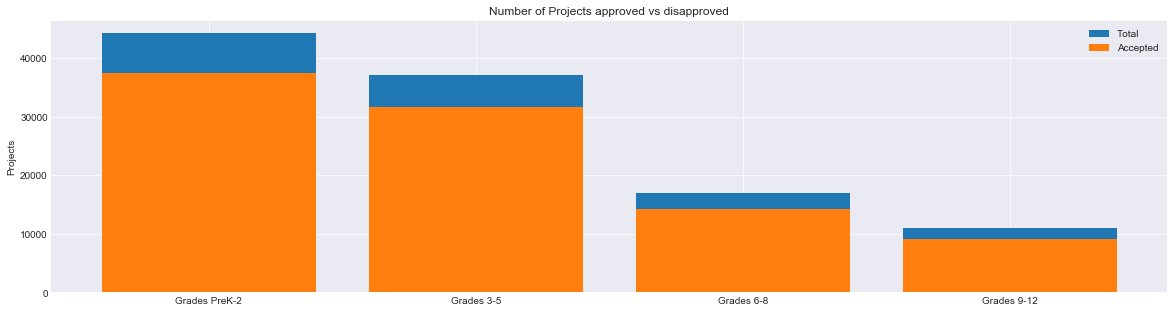

  project_grade_category  project_is_approved  Total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
----------------------------------------------------------------------
  project_grade_category  project_is_approved  Total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [31]:
customBar( 'project_grade_category', 'project_is_approved' ) 

## Teacher's Number of Previously posted project

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


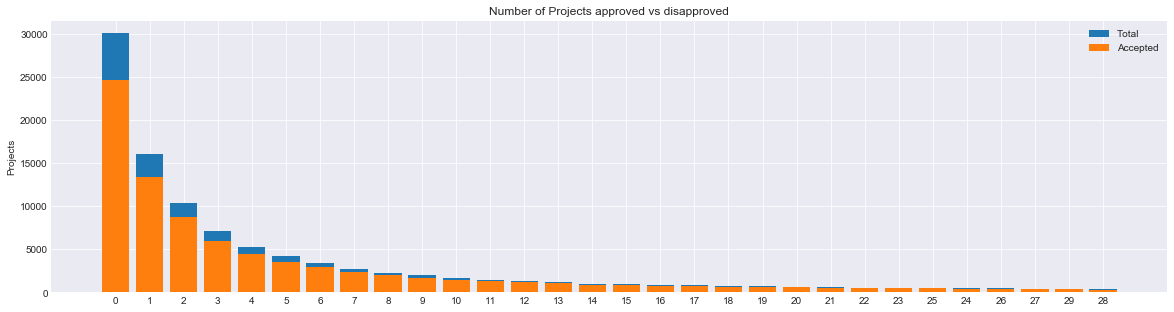

   teacher_number_of_previously_posted_projects  project_is_approved  Total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
----------------------------------------------------------------------
    teacher_number_of_previously_posted_projects  project_is_approved  Total  \
24                                            24                  405    449   
26                                            26                  378    445   
27                                            27                  352    394   
29                                            29  

In [32]:
customBar( 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=30 )

Every one of the Teacher has > 80 % chance of getting a succesful approval

Chances of getting approved is higher for those teachers who have previously posted projects <br><br>

In [33]:
donor['project_subject_categories'].head()


0                    Literacy & Language
1      History & Civics, Health & Sports
2                        Health & Sports
3    Literacy & Language, Math & Science
4                         Math & Science
Name: project_subject_categories, dtype: object

We need to clean the spaces and punctuations in textual data

### Function to clean Data for Analysis on textual data

In [34]:
def clean( col ):   # Function to clean Data
    li = [] # will contain final list of cleaned word
    data = list( donor[col].values ) # List of all the values in a column
    
    for i in data:
        s = ""
        for j in i.split(','): # Will Split based on ,
           
            if 'The' in j.split(): 
                j=j.replace('The','')   # remove The if present
            j = j.replace(' ', '')
            
            s += j.strip()+" " # Space to seperate two words
            s = s.replace('&', '-')
        li.append( s.strip() )
    return li

In [35]:
li = clean('project_subject_categories')
print( li[0:5] )

['Literacy-Language', 'History-Civics Health-Sports', 'Health-Sports', 'Literacy-Language Math-Science', 'Math-Science']


## Project Categories

In [36]:
donor['clean_categories'] = clean('project_subject_categories')

donor.drop( ['project_subject_categories'], axis=1, inplace=True )

In [37]:
donor.head(4)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy-Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History-Civics Health-Sports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health-Sports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy-Language Math-Science


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


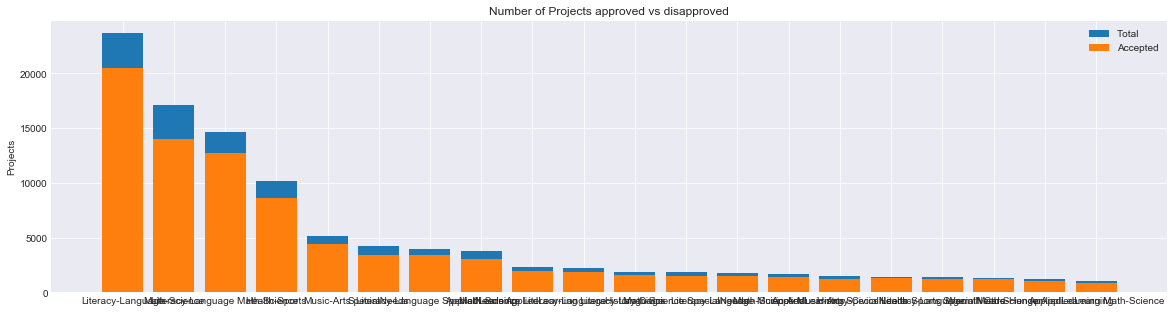

                  clean_categories  project_is_approved  Total       Avg
24               Literacy-Language                20520  23655  0.867470
32                    Math-Science                13991  17072  0.819529
28  Literacy-Language Math-Science                12725  14636  0.869432
8                    Health-Sports                 8640  10177  0.848973
40                      Music-Arts                 4429   5180  0.855019
----------------------------------------------------------------------
                    clean_categories  project_is_approved  Total       Avg
19  History-Civics Literacy-Language                 1271   1421  0.894441
14        Health-Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care-Hunger                 1212   1309  0.925898
33      Math-Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math-Science                  855   1052  0.812738


In [38]:
customBar( 'clean_categories', 'project_is_approved', top=20 )

<b> We can see different Fields like  Health-Sports SpecialNeeds, Math-Science AppliedLearning etc concatenated to one single field</b>

We need to separate those fields for thorough analysis <br>

In [39]:
from collections import Counter

counter = Counter()

for w in donor['clean_categories'].values:
    counter.update(w.split())
    
# Ref : https://www.journaldev.com/20806/python-counter-python-collections-counter

In [40]:
print(counter)
type(counter)

Counter({'Literacy-Language': 52239, 'Math-Science': 41421, 'Health-Sports': 14223, 'SpecialNeeds': 13642, 'AppliedLearning': 12135, 'Music-Arts': 10293, 'History-Civics': 5914, 'Warmth': 1388, 'Care-Hunger': 1388})


collections.Counter

In [41]:
count = dict( counter ) # Since counter looks like a dict but is of the form Counter we need to convert it to dictionary

# Now sorting the count dictionary based on values on the dict
# This Step is just done to display the graph in increasing order nothing else it's just for a clean display

scount = sorted( count.items(), key = lambda v: v[1] )  # Returns a list of dict sorted by values
scount = dict( scount )         # Converting list to dictionary
print(scount)                # Sorted Dictionary

# Ref : https://stackoverflow.com/a/613218/4084039

{'Warmth': 1388, 'Care-Hunger': 1388, 'History-Civics': 5914, 'Music-Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health-Sports': 14223, 'Math-Science': 41421, 'Literacy-Language': 52239}


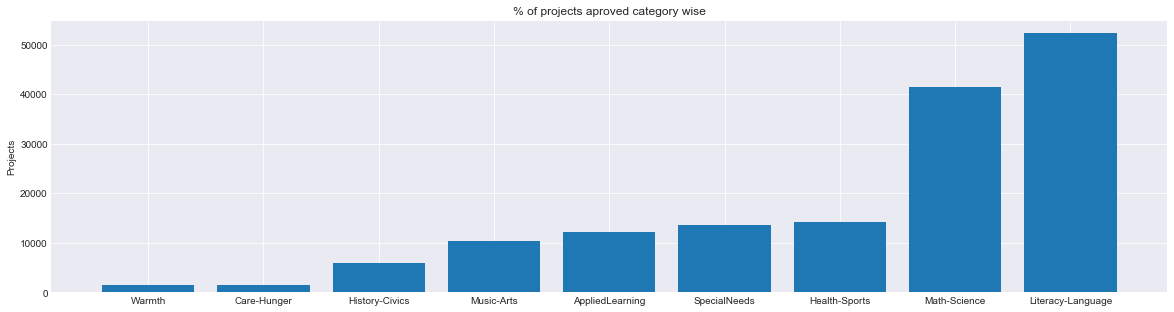

In [42]:
import numpy as np
import matplotlib.pyplot as plt 

ind = np.arange( len(scount) )

plt.figure( figsize=(20,5) )
p1 = plt.bar(ind, list( scount.values() ))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list( scount.keys() ))
plt.show()

The most Highest number of projects approved are from Literacy-Lang and Math-Science Category

Least number of projects approved are from Warmth and Care-Hunger category<br><br>


## Project Subcategories

In [43]:
donor['clean_subcategory'] = clean('project_subject_subcategories')
donor.drop( ['project_subject_subcategories'], axis=1, inplace=True )
donor.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History-Civics Health-Sports,Civics-Government TeamSports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health-Sports,Health-Wellness TeamSports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy-Language Math-Science,Literacy Mathematics
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math-Science,Mathematics


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


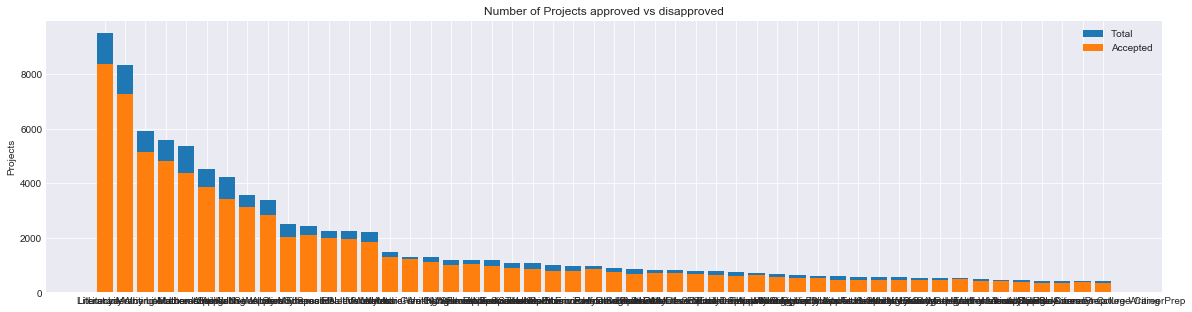

                  clean_subcategory  project_is_approved  Total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature-Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature-Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
----------------------------------------------------------------------
                      clean_subcategory  project_is_approved  Total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College-CareerPrep                  343    421  0.814727
17   AppliedSciences Literature-Writing                  361    420  0.859524
3    AppliedSciences College-CareerPrep                  330    405  0.814815


In [44]:
customBar( 'clean_subcategory', 'project_is_approved', top=50 )

We can see different Fields like  AppliedSciences Literature-Writing, Literacy Mathematics etc concatenated to one single field

We need to separate those fields for thorough analysis <br>

In [45]:
from collections import Counter

scounter = Counter()

for w in donor['clean_subcategory'].values:
    scounter.update(w.split())
    
# Ref : https://www.journaldev.com/20806/python-counter-python-collections-counter

In [46]:
subcount = dict( scounter ) # Since counter looks like a dict but is of the form Counter we need to convert it to dictionary

# Now sorting the count dictionary based on values on the dict

subcount = sorted( subcount.items(), key = lambda v: v[1] )  # Returns a list of dict sorted by values
subcount = dict( subcount )         # Converting list to dictionary

# Ref : https://stackoverflow.com/a/613218/4084039

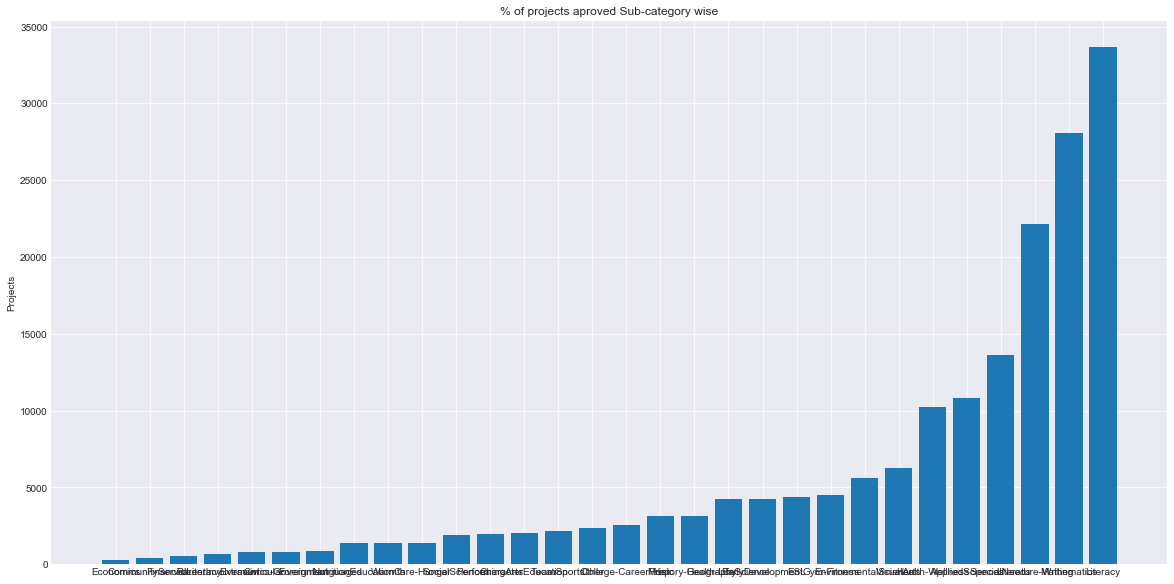

In [47]:
ind = np.arange( len(subcount) )

plt.figure( figsize=(20,10) )
p1 = plt.bar(ind, list( subcount.values() ))

plt.ylabel('Projects')
plt.title('% of projects aproved Sub-category wise')
plt.xticks(ind, list( subcount.keys() ))
plt.show()

In [48]:
# Just to display it more nicely in Tabular form
for k, v in subcount.items():
    print(" {:20} :{:10} ".format(k,v) ) # {:20} means 20 spaces from the Left must be used inside {} 

 Economics            :       269 
 CommunityService     :       441 
 FinancialLiteracy    :       568 
 ParentInvolvement    :       677 
 Extracurricular      :       810 
 Civics-Government    :       815 
 ForeignLanguages     :       890 
 NutritionEducation   :      1355 
 Warmth               :      1388 
 Care-Hunger          :      1388 
 SocialSciences       :      1920 
 PerformingArts       :      1961 
 CharacterEducation   :      2065 
 TeamSports           :      2192 
 Other                :      2372 
 College-CareerPrep   :      2568 
 Music                :      3145 
 History-Geography    :      3171 
 Health-LifeScience   :      4235 
 EarlyDevelopment     :      4254 
 ESL                  :      4367 
 Gym-Fitness          :      4509 
 EnvironmentalScience :      5591 
 VisualArts           :      6278 
 Health-Wellness      :     10234 
 AppliedSciences      :     10816 
 SpecialNeeds         :     13642 
 Literature-Writing   :     22179 
 Mathematics        

From the above graph and Data we see that highest number of projects are from Literarcy category

And lowest are from Economics<br><br>

## Title

Calculating the number of words in Project Title

In [49]:
# wc = donor['project_title'].str.split() # Splits based on spaces and returns a list of lists
# wc = donor['project_title'].str.split().apply(len) # Returns a series that contains the length of each list insisde an list


In [50]:
wc = donor['project_title'].str.split().apply(len).value_counts()
wc
# Returns count of words and number of titles that have that much words
# for ex : 4 words are present in 19979 titles

4     19979
5     19677
3     18691
6     14824
7     10631
2      8733
8      7289
9      5383
10     3968
1        31
11       30
12       11
13        1
Name: project_title, dtype: int64

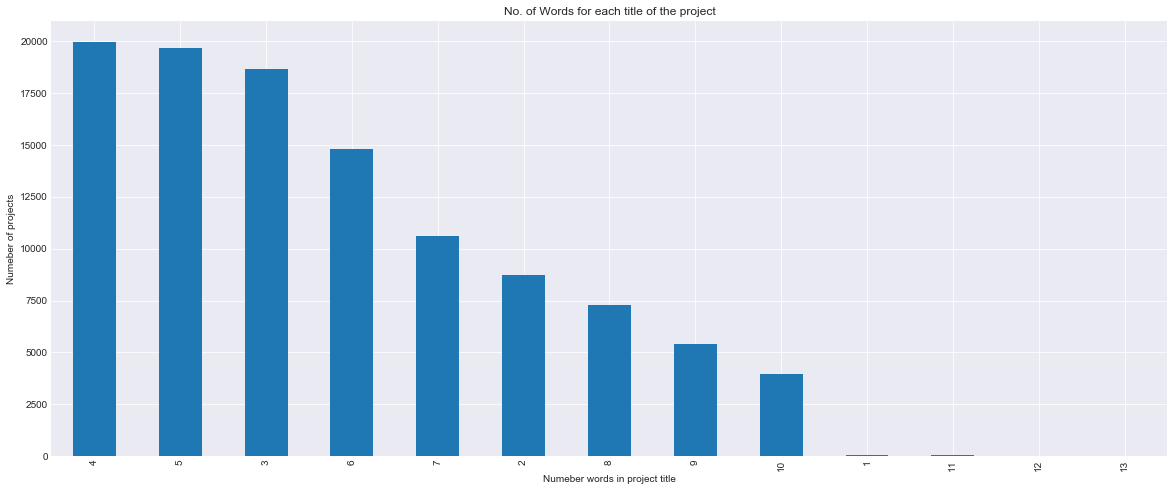

In [51]:
plt.figure(figsize=(20,8))

wc.plot(kind='bar')

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('No. of Words for each title of the project')
plt.show()


In [52]:
# donor[donor['project_is_approved'] == 1] # Will return those rows with Approved projects

In [53]:
approvedWC = donor[ donor['project_is_approved'] == 1 ]['project_title'].str.split().apply(len).values

print(len(approvedWC))
approvedWC

92706


array([5, 2, 3, ..., 6, 5, 7], dtype=int64)

In [54]:
rejectedWC = donor[ donor['project_is_approved'] == 0 ]['project_title'].str.split().apply(len).values

print(len(rejectedWC))
rejectedWC

16542


array([7, 7, 4, ..., 3, 6, 3], dtype=int64)

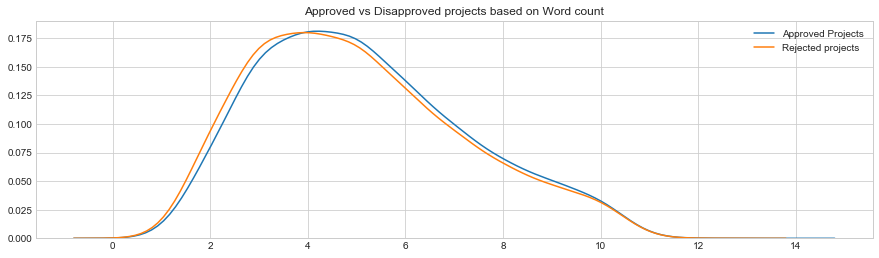

In [55]:
sns.set_style('whitegrid')
plt.figure( figsize = (15,4) )
sns.kdeplot( approvedWC, label="Approved Projects", bw=0.6 )
sns.kdeplot( rejectedWC, label="Rejected projects", bw=0.6 )
plt.title('Approved vs Disapproved projects based on Word count')
plt.legend()
plt.show()

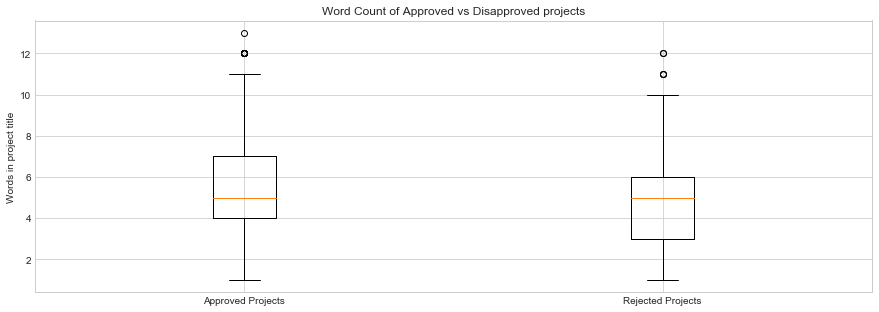

In [56]:
#sns.boxplot( x=approvedWC, y=rejectedWC )  # Can't use this cause of Grouper and axis must be same length Error
#plt.show()
plt.figure( figsize = (15,5) )
plt.boxplot( [ approvedWC, rejectedWC ] )
plt.xticks( [1,2], ('Approved Projects', 'Rejected Projects') )
plt.ylabel('Words in project title')
plt.title('Word Count of Approved vs Disapproved projects')
plt.show()

## Essay

In [57]:
donor.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History-Civics Health-Sports,Civics-Government TeamSports


We have 4 different project essay Project Essay 1, Project Essay 2, Project Essay 3, Project Essay 4

We need to combine them for analysis<br><br>

In [58]:
a = donor['project_essay_1'] + donor['project_essay_2']  # To combine 2 essay

a[0][0:700]  # Select 1st row and only display 1st 700 words

'My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \\r\\n\\r\\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\\"The limits of your language are the limits of your world.\\"-Ludwig Wittgenstein  Our English learner\'s have a strong support system at home that begs for more res'

In [59]:
a = donor['project_essay_1'] + donor['project_essay_2'] + donor['project_essay_3']
a[0]

# This gives NAN because  project_essay_3 contains NAN and not any string
# So we need to map only those values which are string to avoid getting NAN so we use .map(str)
# i.e; only add if str

nan

In [60]:
a = donor['project_essay_1'] + donor['project_essay_2'] + donor['project_essay_3'].map(str)
a[0][0:700]

'My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \\r\\n\\r\\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\\"The limits of your language are the limits of your world.\\"-Ludwig Wittgenstein  Our English learner\'s have a strong support system at home that begs for more res'

In [61]:
# Now we combine all Essay and Create a new column called Essay

donor['Essay'] = donor['project_essay_1'].map(str) + donor['project_essay_2'].map(str) + \
                 donor['project_essay_3'].map(str) + donor['project_essay_4'].map(str)
    
donor.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,Essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...


In [62]:
from tqdm import tqdm

data = list( donor['Essay'].values )
li = []
for i in tqdm(data):
    s = ""
    for j in i.split():
    
        j = j.replace('\\r', ' ')
        j = j.replace('\\n', '')
        j = j.replace('\r', ' ')
        j = j.replace('\n', '')        
        j = j.replace('\\', '')
        j = j.replace("{\}",'')
        j = j.replace('  ', ' ')

        s += j.strip() + " "  # To add a space bw words

    li.append(s.strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:01<00:00, 1764.12it/s]


In [63]:
print( a[0] )
print('\n','-'*50, 'After Cleaning','-'*50,'\n')
print( li[0] )

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [64]:
donor['cleanEssay'] = li

In [65]:
donor[ ['Essay', 'cleanEssay']].head()

,Essay,cleanEssay
0,My students are English learners that are work...,My students are English learners that are work...
1,Our students arrive to our school eager to lea...,Our students arrive to our school eager to lea...
2,"\r\n\""True champions aren't always the ones th...","""True champions aren't always the ones that wi..."
3,I work at a unique school filled with both ESL...,I work at a unique school filled with both ESL...
4,Our second grade classroom next year will be m...,Our second grade classroom next year will be m...


In [66]:
donor.drop(['Essay'], axis=1, inplace=True)
donor.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...


In [67]:
approvedWC = donor[ donor['project_is_approved'] == 1 ] ['cleanEssay'].str.split().apply(len).values
print( len(approvedWC) )
approvedWC

92706


array([223, 213, 234, ..., 181, 255, 265], dtype=int64)

In [68]:
rejectedWC = donor[ donor['project_is_approved'] == 0 ] ['cleanEssay'].str.split().apply(len).values
print( len(rejectedWC) )
rejectedWC

16542


array([274, 361, 220, ..., 211, 299, 317], dtype=int64)

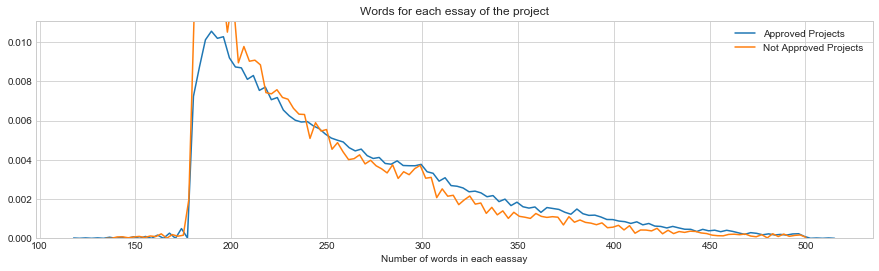

In [69]:
plt.figure( figsize=(15,4) )
sns.kdeplot(approvedWC, label="Approved Projects", bw=0.4)
sns.kdeplot(rejectedWC, label="Not Approved Projects", bw=0.4)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

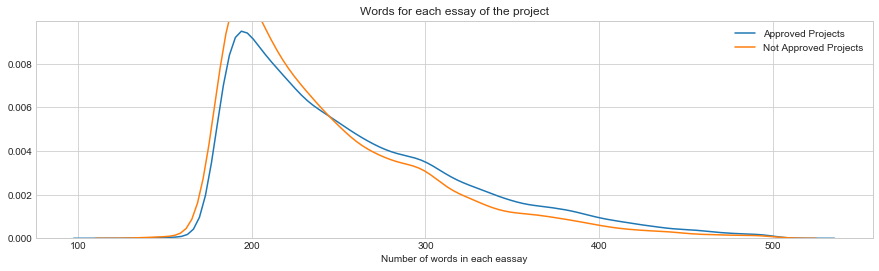

In [70]:
plt.figure( figsize=(15,4) )
sns.distplot(approvedWC, label="Approved Projects", hist=False)
sns.distplot(rejectedWC, label="Not Approved Projects", hist=False)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

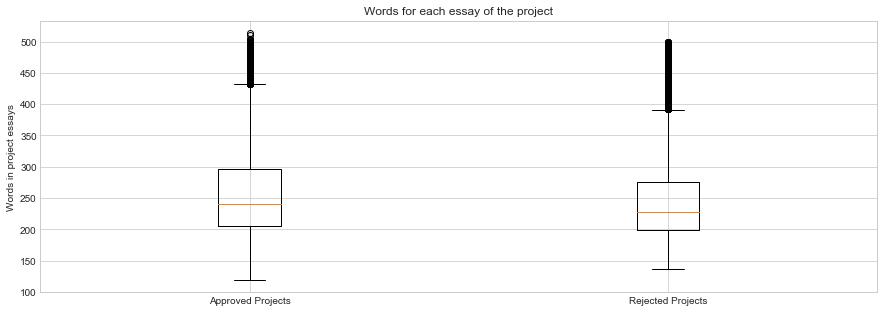

In [71]:
sns.set_style('whitegrid')

plt.figure( figsize=(15,5) )
plt.boxplot([approvedWC, rejectedWC])

plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.show()

## Project Resource Summary

In [72]:
wd = list( donor['project_resource_summary'].values )
wd[14]

'My students need 5 tablets for our classroom technology center PLEASE!!!'

#### Calculation to find indexes of those Summary that contains a digit in them

In [73]:
# To check which row no. contains a digit in project_resource_summary
x = 0 
index = []    # index is a list that contains index no. of Summary that contains a digit
for i in tqdm( wd ):
    for j in i.split():
        
        if j.isdigit():
            index.append(x)    
            break
    x += 1  

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 237257.44it/s]


In [74]:
cd = len( index )
cd

11237

11237 Project Resource Summary contains a digit in them

In [75]:
count = 0    # count if no of Summary that conatins a digit is approved
for i in tqdm( index ):
    if donor['project_is_approved'][i] == 1:
        count += 1

100%|█████████████████████████████████████████████████████████████████████████| 11237/11237 [00:00<00:00, 64380.03it/s]


In [76]:
cdna = cd - count  # cdna : contains a digit and not approved
left = 109248 - cd  # left : Summary that dosen't contain a digit

print('No of Summary Containing a digit : ',cd )
print('No of Summary Approved conataining a digit : ', count )
print('No of Summary Rejected containing a digit : ',cdna )
print('No of Summary not containing a digit : ',left )

No of Summary Containing a digit :  11237
No of Summary Approved conataining a digit :  10144
No of Summary Rejected containing a digit :  1093
No of Summary not containing a digit :  98011


Out of 11,237 project resource summary which contains a digit in them

There are 10,144 project resource summary which are approved <br><br>

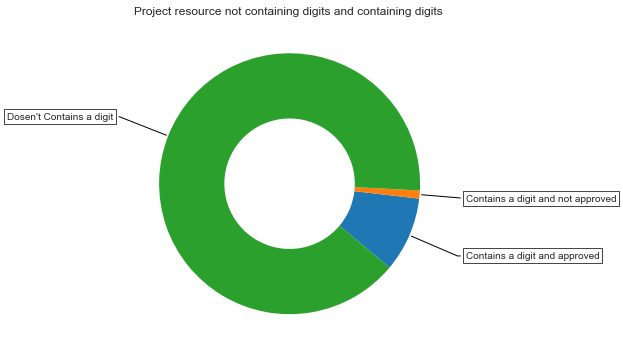

In [77]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(aspect="equal"))  # change here on figsize

recipe = ["Contains a digit and approved", "Contains a digit and not approved", "Dosen't Contains a digit" ]     # change here 

data = [count, cdna, left ]         # change here

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Project resource not containing digits and containing digits ")

plt.show()

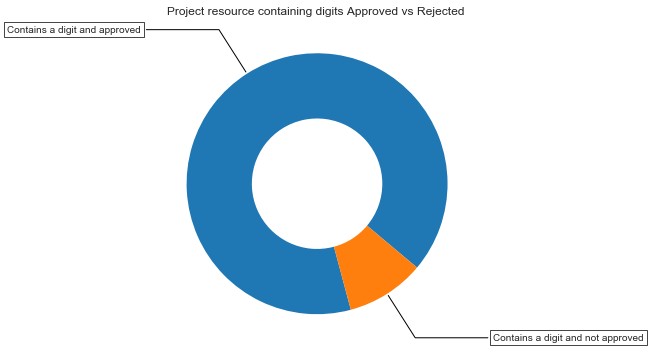

In [78]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(aspect="equal"))  # change here on figsize

recipe = ["Contains a digit and approved", "Contains a digit and not approved" ]     # change here 

data = [count, cdna ]         # change here

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Project resource containing digits Approved vs Rejected ")

plt.show()

There is a 90.27 % chance that if a Project resource summary contains a digit it will be approved

There are only 10 % disapproved  Project that contains a digit in the Resource Summary

Any Project resource summary containing a digit have a high chance of being approved <br><br><br>


#### Calculation to find those indexes that dosen't contain a digit in their Summary

In [79]:
indx = [ i for i in tqdm( range(0, 109248) ) ]  # Total number of rows in donor's

100%|█████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 2256104.44it/s]


In [80]:
indx = list( set(indx) - set(index) )  # Way to subtract two lists
len (indx)   # Now indx will only conatin index of those summary that dosen't have a digit

98011

In [81]:
cnt = 0   # count if no of Summary that dosen't conatins a digit is approved
for i in tqdm( indx ):
    if donor['project_is_approved'][i] == 1:
        cnt += 1     

100%|█████████████████████████████████████████████████████████████████████████| 98011/98011 [00:01<00:00, 72830.75it/s]


In [82]:
left = len(indx) - cnt
cnt

82562

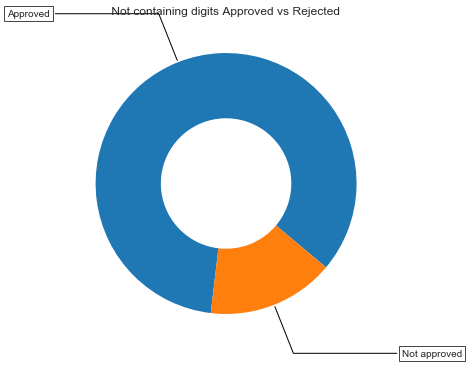

In [83]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(aspect="equal"))  # change here on figsize

recipe = ["Approved", "Not approved" ]     # change here 

data = [cnt, left ]         # change here

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

ax.set_title(" Not containing digits Approved vs Rejected ")

plt.show()


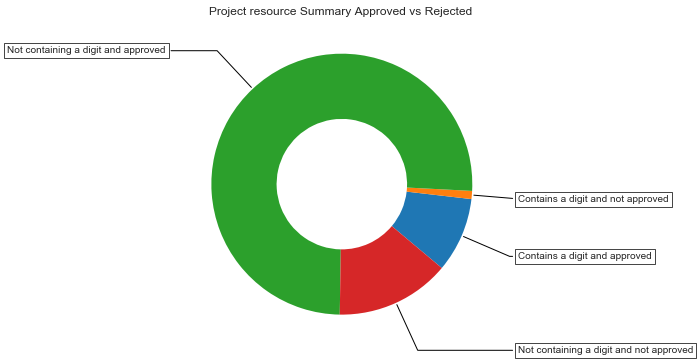

In [84]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(aspect="equal"))  # change here on figsize

recipe = ["Contains a digit and approved", "Contains a digit and not approved",\
           "Not containing a digit and approved", "Not containing a digit and not approved"]     # change here 

data = [count, cdna, cnt, left ]         # change here

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Project resource Summary Approved vs Rejected ")

plt.show()

Above chart displays the complete Approval vs Disapproval rate for Project Resource Summary

## Price 

In [85]:
resource.head()


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


We need to find weather price is a factor in approval or rejection of a project

i,e; Weather lower priced projects are approved and higher priced projects are disapproved and vice-versa

But the price column is in resource df and approval column is in donor df

Therefore we would need to merge our price column to our Donor df<br><br>

In [86]:
resource[ resource['id'] == 'p000001' ]

,id,description,quantity,price
414179,p000001,"Cap Barbell 300 Pound Olympic Set, Grey",2,261.08
414180,p000001,Cap Barbell Power Rack Exercise Stand,2,89.00
414181,p000001,Marcy SB-10510 Flat Bench,1,85.49
414182,p000001,ProSource Puzzle Exercise Mat High Quality EVA...,2,23.99


There are multiple different stuff for same id with different quantity and price

We need to sum up the price and quantity and reflect it as a single id

i.e; for id = 'p000001' there should only be only row that contains sum( price ) and sum( quantity ) <br><br>

In [87]:
price = resource.groupby('id').agg( {'price':'sum', 'quantity':'sum'}).reset_index()
price.head()

# for the same id sum the column price and quantity and and group by id with proper index

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4
3,p000004,1113.69,98
4,p000005,485.99,8


In [88]:
# Merging price with donor

donor = pd.merge( donor, price, on='id', how='left') # left is donor

donor.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1


In [89]:
#donor [ donor['id'] == 'p069063' ] 

In [90]:
donortemp = donor


In [91]:
donortemp.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1


In [92]:
donortemp.to_csv('cleandonor1.csv', encoding='utf-8')
# Saving the .csv file

In [93]:
approvedP = donor[ donor['project_is_approved'] == 1 ]['price'].values  # gives an array that contains prices

len(approvedP) 

92706

In [94]:
rejectedP = donor[ donor['project_is_approved'] == 0 ]['price'].values

len(rejectedP)

16542

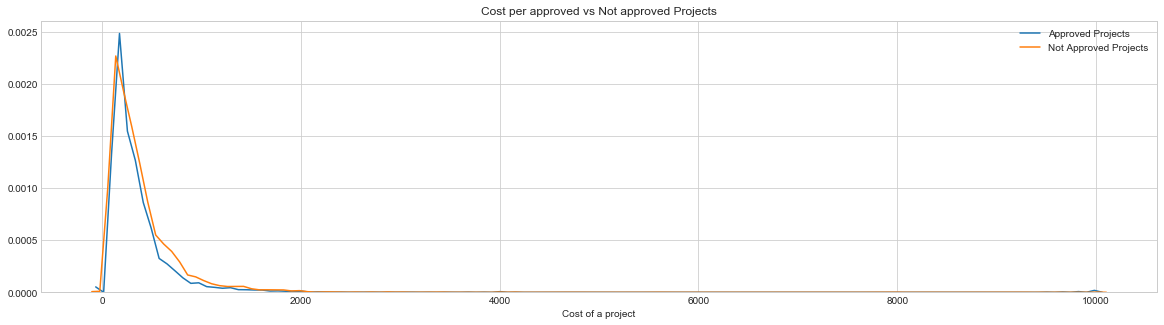

In [95]:
plt.figure(figsize=(20,5))
sns.distplot(approvedP, hist=False, label="Approved Projects")
sns.distplot(rejectedP, hist=False, label="Not Approved Projects")
plt.title('Cost per approved vs Not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

# Building data matrix of features

In [96]:
donor.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategory', 'cleanEssay', 'price',
       'quantity'],
      dtype='object')

The columns contains the following types of value

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategory : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Converting Categorical data into One Hot encoded feature

## Categories

In [97]:
donor['clean_categories'].head()

0                 Literacy-Language
1      History-Civics Health-Sports
2                     Health-Sports
3    Literacy-Language Math-Science
4                      Math-Science
Name: clean_categories, dtype: object

We need to seperate feilds like Literacy-Language Math-Science, History-Civics Health-Sports for thorough analysis

Luckily we already did that above and created a dictionary called scount  ( see under the heading Project categories )

In [98]:
print( scount )

# displays independant Category and their count in clean_category

{'Warmth': 1388, 'Care-Hunger': 1388, 'History-Civics': 5914, 'Music-Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health-Sports': 14223, 'Math-Science': 41421, 'Literacy-Language': 52239}


scount contains all the different clean category splitted 

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( vocabulary = list( scount.keys() ), lowercase=False, binary=True)
# vocabulary : Mapping or iterable, optional Either a Mapping (e.g., a dict) where keys are terms and values are indices 
# in the feature matrix, or an iterable over terms. If not given, a vocabulary is determined from the input documents.

# binary : boolean, default=False If True, all non zero counts are set to 1. 
# lowercase : boolean, True by default Convert all characters to lowercase before tokenizing.

vect.fit( donor['clean_categories'].values )

print( vect.get_feature_names() )


['Warmth', 'Care-Hunger', 'History-Civics', 'Music-Arts', 'AppliedLearning', 'SpecialNeeds', 'Health-Sports', 'Math-Science', 'Literacy-Language']


In [100]:
category1Hot = vect.transform( donor['clean_categories'].values )

category1Hot.shape
# Convert a collection of text documents to a matrix of token counts
# This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

(109248, 9)

In [101]:
category1Hot

<109248x9 sparse matrix of type '<class 'numpy.int64'>'
	with 27165 stored elements in Compressed Sparse Row format>

In [102]:
print( category1Hot.toarray() )

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Subcategories

In [103]:
donor['clean_subcategory'].head()

0                    ESL Literacy
1    Civics-Government TeamSports
2      Health-Wellness TeamSports
3            Literacy Mathematics
4                     Mathematics
Name: clean_subcategory, dtype: object

We need to seperate fields like Civics-Government TeamSports, Literacy Mathematics for thorough analysis

Luckily we already did that above and created a dictionary called subcount  ( see under the heading Project SubCategories )

In [104]:
print( subcount )

{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics-Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care-Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College-CareerPrep': 2568, 'Music': 3145, 'History-Geography': 3171, 'Health-LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym-Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health-Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature-Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


In [105]:
vect = CountVectorizer( vocabulary = list( subcount.keys() ), binary=True, lowercase=False )

vect.fit( donor['clean_subcategory'].values )

print( vect.get_feature_names() )

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics-Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care-Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College-CareerPrep', 'Music', 'History-Geography', 'Health-LifeScience', 'EarlyDevelopment', 'ESL', 'Gym-Fitness', 'EnvironmentalScience', 'VisualArts', 'Health-Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature-Writing', 'Mathematics', 'Literacy']


In [106]:
subcat1Hot = vect.transform( donor['clean_subcategory'].values )

subcat1Hot.shape

(109248, 30)

## School State

In [107]:
donor['school_state'].head()

0    IN
1    FL
2    AZ
3    KY
4    TX
Name: school_state, dtype: object

In [108]:
vect = CountVectorizer( binary=True, lowercase=False )
vect.fit( donor['school_state'].values )
print( vect.get_feature_names() )

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [109]:
state1Hot = vect.transform( donor['school_state'].values )

state1Hot.shape

(109248, 51)

## Teacher Prefix

In [110]:
donor['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [111]:
vect = CountVectorizer( binary=True, lowercase=False )

vect.fit( donor['teacher_prefix'].values.astype('str') ) # gives error : np.nan is an invalid document, expected byte or unicode string.

print( vect.get_feature_names() )

# Ref : https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']


In [112]:
li2 = list( donor['teacher_prefix'].values )
li3 = list( set( li2 ) )
li3

['Mr.', nan, 'Mrs.', 'Dr.', 'Teacher', 'Ms.']

In [113]:
nan = donor[donor['teacher_prefix'].isnull()]
nan

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity
7820,17809,p180947,834f75f1b5e24bd10abe9c3dbf7ba12f,NaN,CA,2016-11-04 00:15:45,Grades 3-5,1:7 Increasing Tech to Decrease Achievement Gaps,The children at Anna Yates Elementary school a...,My goal is to bring in 1 laptop for every 7 st...,NaN,NaN,My students need a classroom laptop that is ju...,1,1,Literacy-Language Math-Science,Literature-Writing Mathematics,The children at Anna Yates Elementary school a...,910.87,2
30368,22174,p002730,339bd5a9e445d68a74d65b99cd325397,NaN,SC,2016-05-09 09:38:40,Grades 9-12,iPads for STEM Stations,"Within the next 20 years, every job will invol...",The students in our school come from a wide va...,Students will use the iPad station for individ...,Your generosity will allow my students to work...,My students need 5 iPads for STEM stations.,0,1,Literacy-Language,Literature-Writing,"Within the next 20 years, every job will invol...",285.86,16
57654,158692,p197901,e4be6aaaa887d4202df2b647fbfc82bb,NaN,PA,2016-06-03 10:15:05,Grades 3-5,Document Camera,Students at Robertsdale Elementary live in a l...,This SMART Document Camera will improve my stu...,NaN,NaN,My students need a Smart Document Camera to en...,0,1,Literacy-Language Math-Science,Literacy Mathematics,Students at Robertsdale Elementary live in a l...,145.29,2


In [ ]:
donor.iloc[7820, 0] = "Missing" 
donor.iloc[30368, 0] = "Missing" 
donor.iloc[57654, 0] = "Missing"

In [1]:
prefix1Hot = vect.transform( donor['teacher_prefix'].values )

prefix1Hot.shape

# Converting Textual data

## Essay

In [115]:
donor['cleanEssay'].head()

0    My students are English learners that are work...
1    Our students arrive to our school eager to lea...
2    "True champions aren't always the ones that wi...
3    I work at a unique school filled with both ESL...
4    Our second grade classroom next year will be m...
Name: cleanEssay, dtype: object

### Preprocessing Essay and Removing stop words

In [116]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


In [117]:
import re
pxEssay = []
for sentence in tqdm( donor['cleanEssay'] ):
    strx=" "
    sentence =re.sub('[^A-Za-z0-9]+', ' ', sentence)
    
    for word in sentence.lower().split():
        if word not in stopwords:
            strx = strx + word + " "
    pxEssay.append(strx.strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:11<00:00, 1524.22it/s]


In [114]:
pxEssay[100]

'teach dual immersion 4th grade classroom teach 50 day english 50 spanish classroom english model two classrooms 30 students half 4th grade students school come learn science writing math english morning 1 2 come afternoon learn subjects students english learners however many come school speaking english school title school located high poverty area many families farm workers continually discuss implement 4 cs lessons collaboration communication critical thinking creativity also never forget 5th important c caring great bunch students enthusiastic learning reading importantly students grateful help may receive really great group kids sweet students becoming better researchers project builders writers day currently not ability students print publish work students small student laptops not ability print school printer rather far away overworked currently plenty paper nothing would like students freely print work order display share students families need printers ink computers connect pr

### Bag of Words

In [115]:
vect = CountVectorizer( min_df = 10 )

# min_df : ignore terms that have a document frequency strictly lower than the given threshold. 
# This value is also called cut-off in the literature

essayBOW = vect.fit_transform( pxEssay )

In [116]:
essayBOW.shape

(109248, 16509)

In [117]:
type( essayBOW ) 

scipy.sparse.csr.csr_matrix

For each Essay text i.e; 109,248 we have a row of data

Each column 16,509 corresponds to a unique word

It has 16,509 unique words

Here counts is a sparse matrix i.e; most of the value of any row are 0

Any row in sparse matrix is called a Sparse Vector

Sparse vector piled on top of each other is called Sparse Matrix

### TF IDF

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df=10 )

essayTfidf = tfidfvect.fit_transform( pxEssay )

In [119]:
essayTfidf.shape

(109248, 16509)

### Word 2 vec

In [120]:
# Converting Preprocessed Essay into list of words 

sentence = [] # final sentence after filteration

for sen in tqdm( pxEssay ):
    fsentence = []   # filtered sentence
    
    for w in sen.split():
        for cw in w.split():
            
            if cw.isalpha():
                fsentence.append( cw.lower() )
            else:
                continue
                
    sentence.append( fsentence )

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:10<00:00, 10288.77it/s]


In [121]:
print( sentence[0] )

['students', 'english', 'learners', 'working', 'english', 'second', 'third', 'languages', 'melting', 'pot', 'refugees', 'immigrants', 'native', 'born', 'americans', 'bringing', 'gift', 'language', 'school', 'languages', 'represented', 'english', 'learner', 'program', 'students', 'every', 'level', 'mastery', 'also', 'countries', 'represented', 'families', 'within', 'school', 'student', 'brings', 'wealth', 'knowledge', 'experiences', 'us', 'open', 'eyes', 'new', 'cultures', 'beliefs', 'respect', 'limits', 'language', 'limits', 'world', 'ludwig', 'wittgenstein', 'english', 'learner', 'strong', 'support', 'system', 'home', 'begs', 'resources', 'many', 'times', 'parents', 'learning', 'read', 'speak', 'english', 'along', 'side', 'children', 'sometimes', 'creates', 'barriers', 'parents', 'able', 'help', 'child', 'learn', 'phonetics', 'letter', 'recognition', 'reading', 'skills', 'providing', 'dvd', 'players', 'students', 'able', 'continue', 'mastery', 'english', 'language', 'even', 'no', 'one

In [122]:
import gensim

w2vmodel = gensim.models.Word2Vec( sentence, min_count=5, size=50, workers=4 )
# min_count : If a word dosent apper more then the value assigned do't construct w2v for it
# size: dimension of vector to be constructed
# workers: If you hav a multi cores you can set it to 4 for performence

In [123]:
words = list( w2vmodel.wv.vocab )

In [124]:
len(words)  # length of this list describes number of unique words present in all of the essay 

22475

In [125]:
words[30:37]

['wealth', 'knowledge', 'experiences', 'us', 'open', 'eyes', 'new']

In [126]:
w2vmodel.wv.most_similar( 'wealth' )

[('broader', 0.6644074320793152),
 ('unlimited', 0.6555013656616211),
 ('plethora', 0.6267027258872986),
 ('broaden', 0.6176065802574158),
 ('abundant', 0.6164625883102417),
 ('abundance', 0.6149153709411621),
 ('worldly', 0.6128314733505249),
 ('background', 0.5786631107330322),
 ('infinite', 0.5784583687782288),
 ('limitless', 0.5705868601799011)]

In [127]:
w2vmodel.wv['wealth']   # vector for wealth

array([ 2.2972915 , -0.23230083,  0.14651974,  1.4571264 , -2.08519   ,
        0.7463924 , -2.0968003 , -0.46561757,  0.29029006,  0.11704818,
       -0.411498  ,  0.6220906 , -0.73459125, -1.648249  , -0.555892  ,
       -0.8109686 ,  0.91140705,  0.466271  , -2.5466573 ,  0.00874885,
        2.2452548 , -0.42181182, -1.2918601 , -1.0590621 ,  0.52283645,
        0.7040063 , -0.53531504, -1.7940743 ,  0.71368974,  0.75286186,
        1.1091858 , -0.42757288, -0.19363362, -1.0556762 , -0.94309676,
       -1.199043  , -1.3032598 ,  1.9385453 , -2.4632406 , -1.6300097 ,
       -1.7551317 ,  0.37195426, -1.9626294 ,  1.3436184 ,  1.9238209 ,
       -1.0532326 ,  0.20420183, -1.0227035 ,  1.3968062 , -0.11297584],
      dtype=float32)

In [128]:
w2vmodel.wv.similarity('man', 'women') 

0.5838106

### Average Word 2 Vec

In [129]:
len( words )

22475

In [130]:
sentV = [] # average word 2 vec for each essay is stored in this

for sent in tqdm( sentence[ 0:4000 ] ):
    
    svec = np.zeros(50)
    cnw = 0
    
    for w in sent:
        if w in words:
            vec = w2vmodel.wv[ w ]  #Computing word 2 vec
            svec += vec     # Add it to the svec
            cnw += 1
            
    if cnw != 0:        
        svec /= cnw  # Averaging with the count of number of words with valid vector in the Essay
    sentV.append( svec )

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:16<00:00, 235.39it/s]


In [131]:
len( sentV )

4000

In [132]:
sentV[4]

array([-1.14373287, -0.06964894, -0.18121997, -0.37453031, -0.21823376,
       -0.09709558,  0.53370711, -0.12566627,  0.61013053,  0.47489385,
        1.71807996, -0.11015176, -1.01991106,  0.16803755, -1.93746539,
       -0.24641573, -0.03039888,  0.09871206, -0.65211236,  0.22682754,
       -0.61318045, -0.40827559,  0.09657415,  0.23509732,  0.28346166,
        1.63726734,  0.52228334,  0.49071486,  0.36053427, -0.42291817,
       -0.44645773,  0.05334899, -0.01596474, -0.4386919 ,  0.20940956,
       -0.22896526,  0.45173987,  0.04157363, -0.33189989,  0.34452685,
       -0.37009897, -0.45664528, -0.49413571, -0.31447348, -1.41343658,
        0.37822547,  0.51994364, -0.34819096,  0.2425509 , -1.01939891])

In [133]:
essayV = np.asarray( sentV )

In [134]:
type( essayV )

numpy.ndarray

### TF-IDF Weighted Word 2 Vec

In [135]:
tfidf = TfidfVectorizer( ngram_range = (1,2) )
essayTfidf = tfidf.fit_transform( pxEssay )

In [136]:
essayFeatures = tfidfvect.get_feature_names()  # Tf idf words/ col names

essayWw2v = []  # the Tfidf weighted w2v for each sentence is stored here
row = 0

for sent in tqdm( sentence[0:4000] ):
    sv = np.zeros( 50 )  # as word vectors are of zero length
    ws = 0  # ws : weight sum, num of words with a valid vector in the sentence/review
    
    for w in sent:      
        
        try:
            vec = w2vmodel.wv[ w ]
            tfidf = essayTfidf[ row, essayFeatures.index( w ) ]
            # dicti[w] = idf value of word in whole courpus
            # sent.count(w) = tf values of word in this review
            
            sv += ( vec * tfidf )
            ws += tfidf
        
        except:
            pass
        
    if ws != 0:
        sv /= ws
    essayWw2v.append( sv )
    row += 1

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [02:39<00:00, 25.14it/s]


In [137]:
essayWW2V = np.asarray( essayWw2v )
essayWW2V.shape

(4000, 50)

## Project Title

In [153]:
donor['project_title'].head()

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [119]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 76149.05it/s]


In [120]:
len( ftitle )


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23


### Bag of Words

In [138]:
vect = CountVectorizer( min_df = 10 )

titleBOW = vect.fit_transform( ftitle )  # Converts various title to vectors and stores it all in Sparse matrix

In [139]:
titleBOW.shape

(109248, 3294)

In [158]:
a = titleBOW.toarray()

In [159]:
print( a[200][3000:3300] )  # displays 200th row with column number 3,000 to 3,300

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### TF IDF

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfVectorizer( min_df = 10 )

titleTfidf = tfidf.fit_transform( ftitle )

In [161]:
titleTfidf.shape

(109248, 3294)

### Word 2 Vec

In [162]:
tsentence = []

for sen in tqdm( ftitle ):
    fsentence = []
    
    for w in sen.split():
        for cw in w.split():
            
            if cw.isalpha():
                fsentence.append( cw.lower() )
            else:
                continue
    tsentence.append( fsentence )

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 110108.35it/s]


In [163]:
tsentence[0]

['educational', 'support', 'english', 'learners', 'home']

In [164]:
len( tsentence )

109248

In [165]:
import gensim

w2vmodel2 = gensim.models.Word2Vec( tsentence, min_count = 5, size =50, workers = 4 )
# min_count : If a word dosent apper more then the value assigned do't construct w2v for it
# size: dimension of vector to be constructed
# workers: If you hav a multi cores you can set it to 4 for performence

In [166]:
words2 = list( w2vmodel2.wv.vocab )

In [167]:
words2[300:305]

['comes', 'healthy', 'bodies', 'dirty', 'let']

In [168]:
len( words2 )

4241

### Average Word 2 Vec

In [169]:
titleV = [] # average word 2 vec for each essay is stored in this

for sent in tqdm( tsentence[0:4000] ):
    
    svec = np.zeros(50)
    cnw = 0
    
    for w in sent:
        if w in words2:
            vec = w2vmodel2.wv[ w ]  #Computing word 2 vec
            svec += vec     # Add it to the svec
            cnw += 1
            
    if cnw != 0:        
        svec /= cnw  # Averaging with the count of number of words with valid vector in the Essay
    titleV.append( svec )

100%|███████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 11438.50it/s]


In [170]:
len( titleV )

4000

In [171]:
titleV[20]

array([ 0.46545961, -0.00665994,  0.3741681 ,  0.74284711,  0.1840887 ,
       -0.16337312,  0.34372883, -0.24523677,  0.29761325, -0.58708771,
       -0.06630994,  0.58192506,  0.57946505, -0.49438673,  0.8358164 ,
       -0.02276572, -0.73440882, -0.0295137 ,  0.34644103, -0.73725607,
        0.61190021,  0.15979807,  0.00547794, -0.07934505, -0.50164982,
        0.33565021,  0.28022053, -0.10209183,  0.39328131, -0.89198285,
        0.33032274,  0.2849438 ,  0.73681667, -0.67134999, -0.80141231,
        0.31299517, -0.22200122, -0.41473215, -0.42125057,  0.52230256,
        0.30468003,  0.2206456 , -0.55022456, -0.34034432,  0.06964404,
        0.27711499,  0.06406464,  0.72061756, -0.33759343, -0.01112583])

In [172]:
titleV = np.asarray( titleV )
titleV.shape

(4000, 50)

### Tf Idf Weighted Word 2 Vec

In [173]:
tfidf = TfidfVectorizer( ngram_range = (1,2) )
titleTfidf = tfidf.fit_transform( ftitle )

In [174]:
titleFeatures = tfidf.get_feature_names()  # Tf idf words/ col names

titleWw2v = []  # the Tfidf weighted w2v for each sentence is stored here

for sent in tqdm( tsentence[0:4000] ):
    sv = np.zeros( 50 )  # as word vectors are of zero length
    ws = 0  # ws : weight sum, num of words with a valid vector in the sentence/review
    
    for w in sent:
        
        try:
            vec = w2vmodel.wv[ w ]
            tfidf = titleTfidf[ row, titleFeatures.index( w ) ]
            # dictio[w] = idf value of word in whole courpus
            # sent.count(w) = tf values of word in this review
            
            sv += ( vec * tfidf )
            ws += tfidf
        except:
            pass
        
        if ws != 0:
            sv /= ws
    titleWw2v.append( sv )

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [01:01<00:00, 64.56it/s]


In [175]:
titleWW2V = np.asarray( titleWw2v )
titleWW2V.shape

(4000, 50)

In [176]:
titleWW2V[300]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Converting Numerical Features

### Price

In [138]:
donor['price'].head()

0    154.60
1    299.00
2    516.85
3    232.90
4     67.98
Name: price, dtype: float64

In [139]:
from sklearn.preprocessing import StandardScaler

prices = StandardScaler()
# prices.fit( resource['price'].values ) # gives Value error Expected 2D array, got 1D array instead

# Reshape your data either using array.reshape(-1, 1) if your data has a single feature

In [140]:
import numpy as np

prices.fit( donor['price'].values.reshape(-1, 1) )

print("Mean of Prices : ", prices.mean_[0])
print("Standard Deviation : ", np.sqrt( prices.var_[0] ) )

Mean of Prices :  298.1193425966608
Standard Deviation :  367.49634838483496


In [141]:
sprice = prices.transform( donor['price'].values.reshape(-1, 1) )

In [142]:
sprice.shape

(109248, 1)

In [143]:
sprice

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### No. of previously posted projects

In [144]:
donor['teacher_number_of_previously_posted_projects'].head()

0    0
1    7
2    1
3    4
4    1
Name: teacher_number_of_previously_posted_projects, dtype: int64

In [145]:
prev = StandardScaler()

prev.fit( donor['teacher_number_of_previously_posted_projects'].values.reshape(1, -1) )
print("Mean : ", prev.mean_[0])
print("SD: ", np.sqrt( prev.var_[0]) )

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Mean :  0.0
SD:  0.0


In [146]:
# To fix this warning we can cast it by using .astype(float)
donor['teacher_number_of_previously_posted_projects'] = donor['teacher_number_of_previously_posted_projects'].astype(float)

In [147]:
prev = StandardScaler()

prev.fit( donor['teacher_number_of_previously_posted_projects'].values.reshape(1, -1) )

StandardScaler(copy=True, with_mean=True, with_std=True)

In [148]:
sprev = prev.transform( donor['teacher_number_of_previously_posted_projects'].values.reshape(1, -1) ) 

In [149]:
sprev.shape 

(1, 109248)

In [150]:
sprev[0][90000:90050]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [151]:
sprev = sprev.T
sprev.shape

(109248, 1)

# Merging Features

In [164]:
a = np.array((1,2,3))
b = np.array((2,3,4))

np.hstack((a,b))

# hstack : Stack arrays in sequence horizontally (column wise). This is equivalent to concatenation along the second axis
# Ref : https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.hstack.html

array([1, 2, 3, 2, 3, 4])

In [165]:
a = np.array([[1],[2],[3]])
b = np.array([[2],[3],[4]])
print( a )
print( b )
np.hstack((a,b))

[[1]
 [2]
 [3]]
[[2]
 [3]
 [4]]


array([[1, 2],
       [2, 3],
       [3, 4]])

### Category, Title( BOW ) and Price

In [166]:
print( category1Hot.shape )
print( titleBOW.shape )
print( sprice.shape )

(109248, 9)
(109248, 3294)
(109248, 1)


In [167]:
from scipy.sparse import hstack

merged1 = hstack( ( category1Hot[0:4000], titleBOW[0:4000], sprice[0:4000] ) )

In [168]:
merged1.shape

(4000, 3304)

In [169]:
type( merged1 )

scipy.sparse.coo.coo_matrix

In [170]:
m1 = merged1.toarray() # Converting to array for slicing and other operations

In [171]:
m1[1030]

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , 26.39721646])

In [188]:
label = donor['project_is_approved'].values

label.shape


(109248,)

In [189]:
label4k = label[ 0 : 4000]

In [173]:
from sklearn.manifold import TSNE

data4k = m1[ 0 : 4000, : ]

model = TSNE( n_components = 2, random_state = 0 )
# the number of components is n-components i,e; 2
# default perplexity = 30, default learning rate = 200

tsneData = model.fit_transform( data4k )

In [174]:
tsneData.shape

(4000, 2)

In [175]:
tsneData = np.vstack( ( tsneData.T, label4k )).T

tsneData.shape

(4000, 3)

In [176]:
tsneDf = pd.DataFrame( data = tsneData, columns = ('Dim 1', 'Dim 2', 'label') )

tsneDf.head()

,Dim 1,Dim 2,label
0,14.879907,0.378661,0.0
1,10.175729,6.671117,1.0
2,34.590672,5.658667,0.0
3,10.348578,3.899291,1.0
4,19.775257,27.422304,1.0


In [177]:
# Intead of running the TSNE model again and again we save it to a csv file for quick access

tsneDf.to_csv('CatTitlePrice.csv', header=True)

## Will save it to CSV with Column header (with col name) 

#### <br/> RUN from here

In [178]:
tnsneDF = pd.read_csv('CatTitlePrice.csv')
tsneDf.head()

,Dim 1,Dim 2,label
0,14.879907,0.378661,0.0
1,10.175729,6.671117,1.0
2,34.590672,5.658667,0.0
3,10.348578,3.899291,1.0
4,19.775257,27.422304,1.0


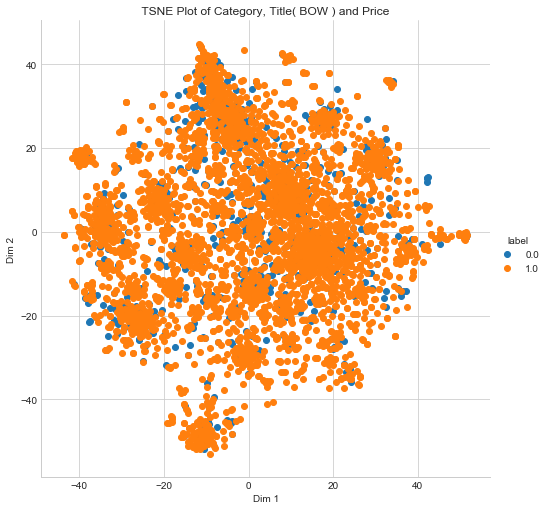

In [179]:
import seaborn as sns
plt.close()
sns.FacetGrid( tsneDf, hue='label', size=7 ).map( plt.scatter, 'Dim 1', 'Dim 2' ).add_legend()
plt.title(' TSNE Plot of Category, Title( BOW ) and Price ')
plt.show()

## Merging Subcategory, Title ( Tf Idf ) and Price

In [54]:
#subcat1Hot titleTfidf sprice
from scipy.sparse import hstack

merged1 = hstack( ( subcat1Hot[0:4000], titleTfidf[0:4000], sprice[0:4000] ))
merged1.shape

(4000, 3325)

In [55]:
merge = merged1.toarray()

merge.shape

(4000, 3325)

In [56]:
from sklearn.manifold import TSNE

data4k = merge

model = TSNE( n_components = 2, random_state = 0 )

tsneData = model.fit_transform( data4k )

In [59]:
tsneData = np.vstack( ( tsneData.T, label4k )).T

tsneData.shape

(4000, 3)

In [60]:
tsneDf = pd.DataFrame( data = tsneData, columns = ('Dim 1', 'Dim 2', 'label') )

tsneDf.head()

,Dim 1,Dim 2,label
0,26.671328,-26.037720,0.0
1,4.959400,-53.613209,1.0
2,6.535785,-52.525517,0.0
3,36.025131,27.794081,1.0
4,3.519259,45.271702,1.0


In [62]:
tsneDf.to_csv('SubcatTitlePrice.csv', header=True)

### <br> Run from here

In [63]:
tsneDf = pd.read_csv('SubcatTitlePrice.csv')

tsneDf.head()

,Unnamed: 0,Dim 1,Dim 2,label
0,0,26.671328,-26.037720,0.0
1,1,4.959400,-53.613209,1.0
2,2,6.535785,-52.525517,0.0
3,3,36.025131,27.794081,1.0
4,4,3.519259,45.271702,1.0


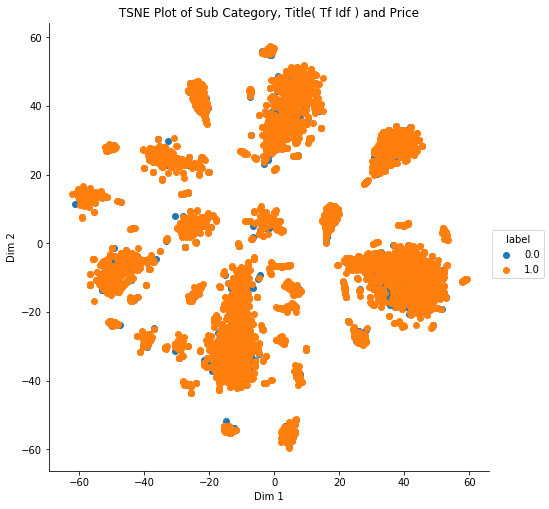

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.close()
sns.FacetGrid( tsneDf, hue='label', size=7 ).map( plt.scatter, 'Dim 1', 'Dim 2' ).add_legend()
plt.title(' TSNE Plot of Sub Category, Title( Tf Idf ) and Price ')
plt.show()

## Merging State, Title( Average W2v ), No. of Previously posted Projects

In [77]:
from scipy.sparse import hstack

merged1 = hstack(( state1Hot[0:4000], titleV[0:4000], sprev[0:4000] ))

merged1.shape

(4000, 102)

In [79]:
merge = merged1.toarray( )

merge.shape

(4000, 102)

In [80]:
from sklearn.manifold import TSNE

data4k = merge

model = TSNE( n_components = 2, random_state = 0 )
tsneData = model.fit_transform( data4k )

In [81]:
tsneData = np.vstack( ( tsneData.T, label4k )).T

tsneData.shape

(4000, 3)

In [82]:
tsneDf = pd.DataFrame( data = tsneData, columns = ('Dim 1', 'Dim 2', 'label') )

tsneDf.head()

,Dim 1,Dim 2,label
0,58.584389,-5.795443,0.0
1,56.886627,-4.966558,1.0
2,56.864437,7.549237,0.0
3,13.725400,-11.347775,1.0
4,19.287474,37.284317,1.0


In [83]:
tsneDf.to_csv( 'StateTitlePrev.csv', header=True )

### Run From Here

In [107]:
tsneDf = pd.read_csv('StateTitlePrev.csv')
tsneDf.head()

,Unnamed: 0,Dim 1,Dim 2,label
0,0,58.584389,-5.795443,0.0
1,1,56.886627,-4.966558,1.0
2,2,56.864437,7.549237,0.0
3,3,13.725400,-11.347775,1.0
4,4,19.287474,37.284317,1.0


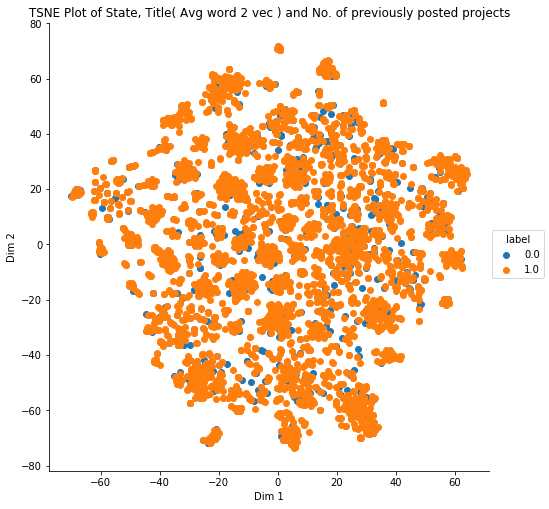

In [108]:
import seaborn as sns
plt.close()
sns.FacetGrid( tsneDf, hue='label', size=7 ).map( plt.scatter, 'Dim 1', 'Dim 2' ).add_legend()
plt.title(' TSNE Plot of State, Title( Avg word 2 vec ) and No. of previously posted projects ')
plt.show()

## Merging Category, Title( Tf Idf weighted word to vec ), Price

In [96]:
from scipy.sparse import hstack

merged1 = hstack(( category1Hot[0:4000], titleWW2V[0:4000], sprice[0:4000] ))

merged1.shape

(4000, 60)

In [98]:
merge = merged1.toarray()
merge.shape

(4000, 60)

In [99]:
from sklearn.manifold import TSNE

data4k = merge

model = TSNE( n_components = 2, random_state = 0 )
tsneData = model.fit_transform( data4k )

In [100]:
tsneData = np.vstack( ( tsneData.T, label4k )).T

tsneData.shape

(4000, 3)

In [101]:
tsneDf = pd.DataFrame( data = tsneData, columns = ('Dim 1', 'Dim 2', 'label') )

tsneDf.head()

,Dim 1,Dim 2,label
0,-4.197543,-31.125223,0.0
1,35.891022,0.763056,1.0
2,-7.189175,78.361000,0.0
3,33.781208,-39.687943,1.0
4,13.099125,-24.864462,1.0


In [102]:
tsneDf.to_csv( 'CatTitleSPrice.csv', header=True )

### Run from here

In [109]:
tsneDf = pd.read_csv('CatTitleSPrice.csv')
tsneDf.head()

,Unnamed: 0,Dim 1,Dim 2,label
0,0,-4.197543,-31.125223,0.0
1,1,35.891022,0.763056,1.0
2,2,-7.189175,78.361000,0.0
3,3,33.781208,-39.687943,1.0
4,4,13.099125,-24.864462,1.0


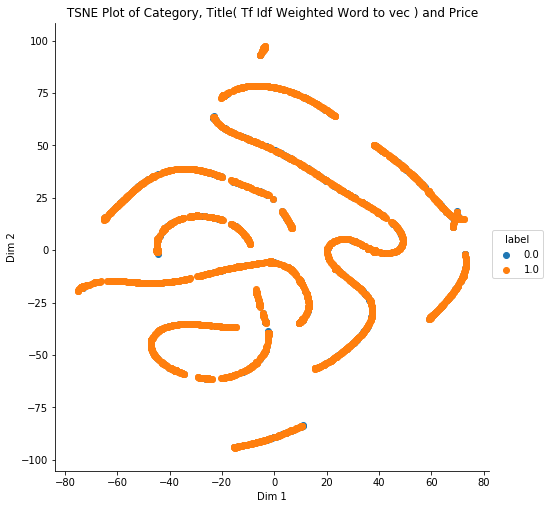

In [110]:
import seaborn as sns
plt.close()
sns.FacetGrid( tsneDf, hue='label', size=7 ).map( plt.scatter, 'Dim 1', 'Dim 2' ).add_legend()
plt.title(' TSNE Plot of Category, Title( Tf Idf Weighted Word to vec ) and Price ')
plt.show()

## Merging all Features

In [177]:
print( category1Hot.shape )
print( subcat1Hot.shape )
print( essayBOW.shape )
print( essayTfidf.shape )
print( essayV.shape )
print( titleBOW.shape )
print( titleTfidf.shape )
print( titleV.shape )
print( sprice.shape )
print( sprev.shape )

(109248, 9)
(109248, 30)
(109248, 16509)
(109248, 2595284)
(4000, 50)
(109248, 3294)
(109248, 155673)
(4000, 50)
(109248, 1)
(109248, 1)


In [179]:
from scipy.sparse import hstack

finalM = hstack( ( category1Hot[:4000], subcat1Hot[:4000], essayBOW[:4000],\
                  titleBOW[:4000], sprice[:4000], sprev[:4000] ) )

In [180]:
finalM.shape

(4000, 19844)

In [181]:
merged = finalM.toarray()

In [182]:
merged.shape

(4000, 19844)

In [183]:
merged[1000]

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.60337836,  0.        ])

In [185]:
from sklearn.manifold import TSNE

model = TSNE( n_components = 2, random_state = 0 )
tnsefData = model.fit_transform( merged )

In [186]:
tnsefData.shape

(4000, 2)

In [190]:
tnsefData = np.vstack(( tnsefData.T, label4k )).T

tnsefData.shape

(4000, 3)

In [191]:
tsneDf = pd.DataFrame( data = tnsefData, columns = ('Dim 1', 'Dim 2', 'label') )

tsneDf.head()

,Dim 1,Dim 2,label
0,15.282107,19.805014,0.0
1,1.366688,-9.984497,1.0
2,-36.762589,17.007107,0.0
3,-5.829681,17.689619,1.0
4,-1.733113,10.159672,1.0


In [192]:
tsneDf.to_csv( 'All.csv', header=True )

### Run from here

In [193]:
tsneDf = pd.read_csv('All.csv')


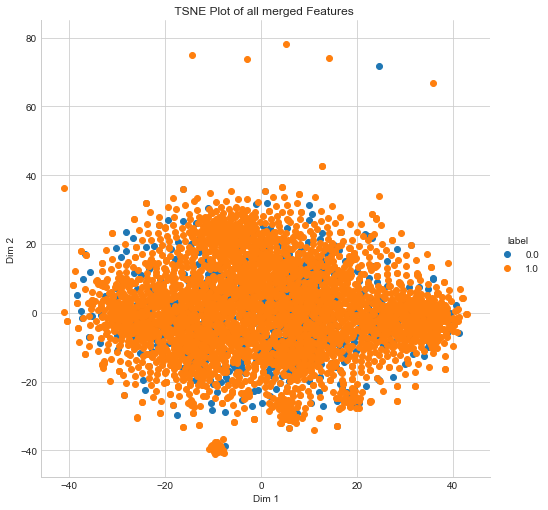

In [194]:
import seaborn as sns
plt.close()
sns.FacetGrid( tsneDf, hue='label', size=7 ).map( plt.scatter, 'Dim 1', 'Dim 2' ).add_legend()
plt.title(' TSNE Plot of all merged Features  ')
plt.show()

### Conclusions

There's a total price of 77,501,284.39 needed for funding for different projects <br><br>

Every one of the Teacher has > 80 % chance of getting a succesful approval

Chances of getting approved is higher for those teachers who have previously posted projects 

Every one of the State has > 80 % successful Approval rate <br><br>

The most Highest number of projects approved are from Literacy-Lang and Math-Science Category

Least number of projects approved are from Warmth and Care-Hunger category <br><br>

There is a 90.27 % chance that if a Project resource summary contains a digit it will be approved

There are only 10 % disapproved  Project that contains a digit in the Resource Summary

Any Project resource summary containing a digit have a high chance of being approved <br><br>

There is a considerable overlap of features in all the plots 

More then two dimensions ( i,e; a 3D plot ) may prove helpful
